In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/yudhistiradwiki/learn-python/main/association_order.csv')
df.shape

(423861, 2)

In [3]:
# cek tipe data dari setiap kolom
print('Dataset Information: \n')
print(df.info())

Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423861 entries, 0 to 423860
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   orderid  423861 non-null  int64
 1   itemid   423861 non-null  int64
dtypes: int64(2)
memory usage: 6.5 MB
None


In [4]:
df.head(10)

,orderid,itemid
0,31379820545759,719740607
1,31378575577269,1825360194
2,31369591568249,1108903291
3,31369836201769,4507360843
4,31372360246729,1821888475
5,31379394328584,77274674
6,31374190005914,1593652521
7,31377911800314,2621009592
8,31384174249994,1251969983
9,31379648797594,6713240910


In [5]:
#Mencetak data item yang unik (memiliki nilai item berbeda)
print('Unique Items: ', df['itemid'].nunique())
print( '\n', df['itemid'].unique())

Unique Items:  239702

 [ 719740607 1825360194 1108903291 ... 6912791179 1340457527 1488272669]


In [6]:
# Cek missing value dan zeros
print(df.isnull().sum().sort_values(ascending=False))

orderid    0
itemid     0
dtype: int64


In [7]:
# cek nilai "NONE" pada kolom Item
print(df[df['itemid']=='NONE'])

Empty DataFrame
Columns: [orderid, itemid]
Index: []


In [8]:
# Mencetak 20 data penjualan item terbanyak
most_sold = df['itemid'].value_counts().head(20)

print('Most Sold Items: \n')
print(most_sold)

Most Sold Items: 

2697336272    217
1897730934    215
2399078400    204
1587892462    176
2283907823    126
6800786360    121
7305019752    116
2874833441    116
995073047     107
1738834829    106
2109291307    103
454021998     101
6304593936     96
1528574126     95
1400976291     95
2079262346     94
905918150      93
1589170448     93
4901898009     93
631161363      93
Name: itemid, dtype: int64


In [9]:
transaction_count = df.groupby(by='itemid')[['orderid']].count().sort_values(by='orderid', ascending=False)
def convert_to_percentage(x):
    return 100 * x / float(x.sum())

transaction_percentage = transaction_count.apply(convert_to_percentage)
transaction_percentage.head()

,orderid
itemid,
2697336272,0.051196
1897730934,0.050724
2399078400,0.048129
1587892462,0.041523
2283907823,0.029727


Text(0.5, 1.0, 'Items Most Sold')

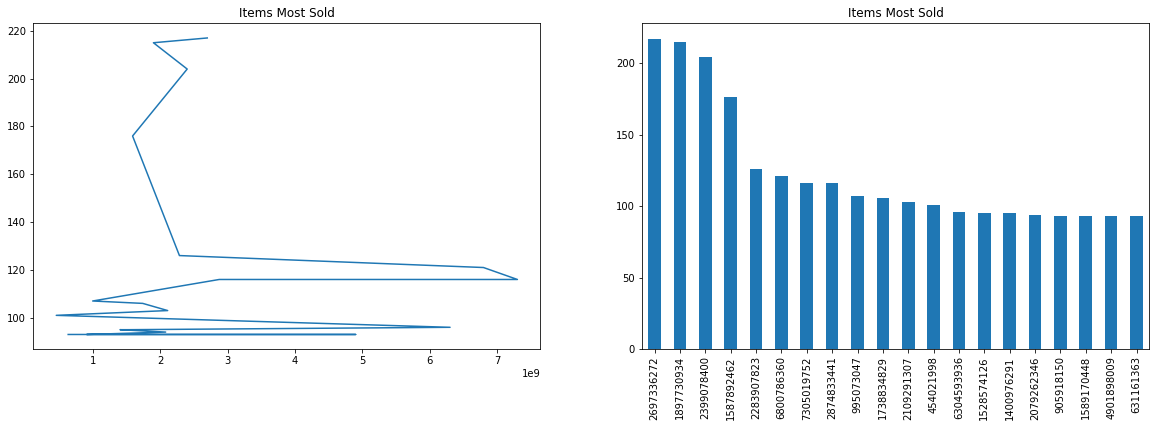

In [10]:
# visualisasikan data penjualan item terbanyak ke line chart dan bar chart
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
#plt.plot(most_sold)
most_sold.plot(kind='line')
plt.title('Items Most Sold')


plt.subplot(1,2,2)
most_sold.plot(kind='bar')
plt.title('Items Most Sold')

In [11]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori

In [12]:
transaction_list = []

# For loop to create a list of the unique transactions throughout the dataset:
for i in df['orderid'].unique():
    tlist = list(set(df[df['orderid']==i]['itemid']))
    if len(tlist)>0:
        transaction_list.append(tlist)
print(len(transaction_list))

92382


In [25]:
transaction_listt = transaction_list[:10000]

In [26]:
te = TransactionEncoder()
te_ary = te.fit(transaction_listt).transform(transaction_listt)
df2 = pd.DataFrame(te_ary, columns=te.columns_)

In [27]:
df2.shape

(10000, 46272)

In [28]:
frequent_itemsets = apriori(df2, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)
metrix = pd.DataFrame(rules)
metrix[['antecedents','consequents', 'support', 'confidence', 'lift']].sort_values('lift', ascending=False)

ValueError: ignored